Perform Principal component analysis.

In [1]:
#Import relevant libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
wine = pd.read_csv('D:/1.0 Studies/DataScience_Excelr/Assignment12_PCAtSNE/wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Considering only numerical data 
wine.data = wine.iloc[:,1:]
wine.data.head()
# Converting into numpy array
WINE = np.round(wine.data.values,decimals = 2)
WINE

<ipython-input-3-34868c6983f5>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
# Normalizing the numerical data 
wine_normal = scale(WINE)

In [5]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36208643,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40596076,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.3182121 ,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61225823,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56838391,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52450958,
        -1.42894777, -0.59516041]])

In [6]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [7]:
pca_values

array([[ 3.31673811e+00, -1.44347809e+00, -1.65710106e-01, ...,
        -4.50963179e-01,  5.40534488e-01, -6.62386628e-02],
       [ 2.20945488e+00,  3.33374808e-01, -2.02644934e+00, ...,
        -1.42432183e-01,  3.88098167e-01,  3.63160519e-03],
       [ 2.51671702e+00, -1.03119154e+00,  9.82848326e-01, ...,
        -2.86498274e-01,  3.04892785e-04,  2.17840225e-02],
       ...,
       [-2.67785969e+00, -2.76092753e+00, -9.40970525e-01, ...,
         5.12474580e-01,  6.98721417e-01,  7.19596706e-02],
       [-2.38702820e+00, -2.29735734e+00, -5.50718868e-01, ...,
         3.00195841e-01,  3.39435332e-01, -2.17884918e-02],
       [-3.20881939e+00, -2.76900249e+00,  1.01382843e+00, ...,
        -2.30140745e-01, -1.88562238e-01, -3.24003873e-01]])

In [20]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)

In [21]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198278, 0.1920793 , 0.11123553, 0.07069848, 0.06563048,
       0.04935783, 0.04238743, 0.0268125 , 0.02222013, 0.01929513,
       0.01736819, 0.01298058, 0.00795163])

In [10]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [11]:
pca.components_

array([[ 0.14432621, -0.24519669, -0.00205641, -0.23932424,  0.14199687,
         0.39465516,  0.42293493, -0.29853948,  0.31343386, -0.08862347,
         0.29669025,  0.37616656,  0.28676007],
       [-0.48364838, -0.22494284, -0.31606788,  0.01058857, -0.29961684,
        -0.06506288,  0.00334706, -0.02877743, -0.03930672, -0.52999589,
         0.27928161,  0.16447755, -0.36488275],
       [-0.20739872,  0.08900284,  0.62621546,  0.61208187,  0.1307647 ,
         0.14618093,  0.15069113,  0.17034777,  0.14947245, -0.13732184,
         0.08517565,  0.16601481, -0.12674656],
       [-0.01781373,  0.53678723, -0.21414563,  0.06080291, -0.35200289,
         0.19816859,  0.15234224, -0.20317159,  0.39892406,  0.06593107,
        -0.42783328,  0.18419094, -0.23209522],
       [-0.26563591,  0.03545487, -0.14311322,  0.06609613,  0.72696995,
        -0.14926756, -0.10900952, -0.50076653,  0.13694364, -0.07639601,
        -0.17362338, -0.10112608, -0.15796405],
       [-0.21354986, -0.536782

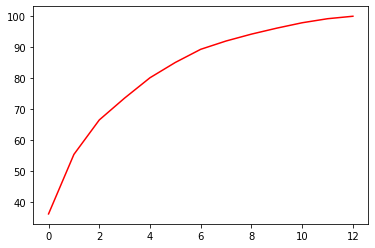

In [12]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [13]:
 pca_values[:,0:1]

array([[ 3.31673811],
       [ 2.20945488],
       [ 2.51671702],
       [ 3.75705361],
       [ 1.00886194],
       [ 3.05023317],
       [ 2.44907301],
       [ 2.05941164],
       [ 2.51085254],
       [ 2.75360854],
       [ 3.47971085],
       [ 1.75473133],
       [ 2.11343489],
       [ 3.45811697],
       [ 4.31276148],
       [ 2.30514049],
       [ 2.1719254 ],
       [ 1.89893001],
       [ 3.54194847],
       [ 2.08449941],
       [ 3.1243813 ],
       [ 1.08652869],
       [ 2.53520015],
       [ 1.64496413],
       [ 1.761538  ],
       [ 0.99002362],
       [ 1.77525787],
       [ 1.23541751],
       [ 2.18834866],
       [ 2.25609263],
       [ 2.5001824 ],
       [ 2.67739641],
       [ 1.62854259],
       [ 1.90264284],
       [ 1.41036294],
       [ 1.90379835],
       [ 1.38482739],
       [ 1.12218112],
       [ 1.50217614],
       [ 2.52977822],
       [ 2.58807745],
       [ 0.66845677],
       [ 3.07079468],
       [ 0.46218105],
       [ 2.10134814],
       [ 1

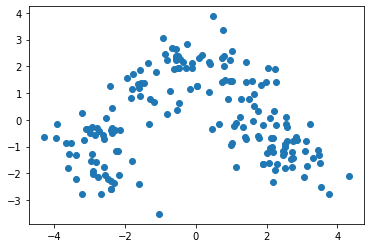

In [14]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [15]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

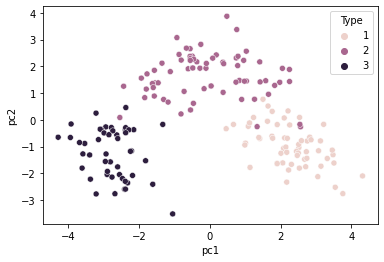

In [16]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')